# MS5114 Assignment 1

In this assignment, you are required to analyze data from Yahoo Finance website using three Python libraries (i.e. `yfinance`, `tensorflow` and `transformers`). Make sure that the required libraries are installed in your Python distribution (use Anaconda Navigator or `pip` command for this purpose). You are to expected have knowledge of following topics to solve the problems.

* data types, operators, conditions, functions
* lists, dictionaries, tuples, data frames
* strings

For details of relevant libraries visit following 

* https://aroussi.com/post/python-yahoo-finance
* https://huggingface.co/blog/sentiment-analysis-python

### Name: _Snigdha Chaudhuri_
### Student Id: _23102262_

In [3]:
# import required libraries
import yfinance as yf
from transformers import pipeline
import matplotlib.pyplot as plt

## Problem 1

Write a function `calc_returns(prices)`. This function will process a list of stock prices and calculate the periodic returns. The function should assume that the oldest price is in `prices[0]` and latest price in `prices[-1]`. The function should use a loop to accumulate a list of returns for periods 1 to n. The periodic rate of return is calculated as the rate of change in price from the previous period, i.e.,

$r_i = \frac{p_i}{p_{i - 1}} - 1$

For example:

```
>>> prices = [100,110,105,112,115]
>>> returns = calc_returns(prices)
>>> print(returns)`
[0.10000000000000009, -0.045454545454545414, 0.06666666666666665, 0.02678571428571419]
```

_Notes_:

* For $n$ stock prices, you will generate a list of $n-1$ periodic returns. There is no return for period $0$.
* The function `calc_prices` should not print any output, but rather creates and returns a list of periodic rates of return.
* When computing with binary floating point numbers, there is a small representational error which might result in an unexpected value in the insignificant digits (e.g., (110 - 100) / 100 gave a result of 0.10000000000000009.) Do not be alarmed by this small error!
* The values in the list of returns will be unformatted floating-point numbers; you can use the `round()` function to round up to 2 decimal points.

In [4]:
# Create a Ticker object for the stock with symbol "PARAA" (Paramount Global)
para = yf.Ticker("PARAA")

# Use the Ticker object to fetch historical stock prices for the past 3 months
prices = para.history("3mo")

Analyze stock prices and returns for a specific period e.g. 1 week or 2 weeks. 

* Using `yfinance` library, load the data about a company's share prices using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of closing prices for each day.
* Use the `calc_returns()` function to calculate the list to returns.
* Print both stock prices and returns.
* Explain the trend in stock prices and returns.

_Note: Avoid using ticker for popular companies so that there is no overlap of tickers between students. Look your Yahoo Finance website to find a different company and its ticker_

Stock Prices: [15.443507194519043, 15.633060455322266, 15.643036842346191, 15.543272018432617, 16.111928939819336, 16.840206146240234, 16.471080780029297, 17.209335327148438, 17.95756721496582, 17.758037567138672, 17.837848663330078, 17.977519989013672, 17.668251037597656, 17.299123764038086, 17.967544555664062, 17.668251037597656, 19.334314346313477, 19.553796768188477, 18.91530418395996, 18.865421295166016, 18.6658935546875, 20.70108413696289, 20.521509170532227, 20.516521453857422, 21.15999984741211, 22.260000228881836, 21.809999465942383, 21.25, 21.290000915527344, 20.03499984741211, 20.31999969482422, 20.600000381469727, 20.149999618530273, 19.809999465942383, 20.09000015258789, 19.65999984741211, 19.18000030517578, 18.979999542236328, 19.280000686645508, 19.579999923706055, 19.760000228881836, 19.010000228881836, 18.989999771118164, 18.239999771118164, 18.15999984741211, 18.350000381469727, 18.1299991607666, 18.21500015258789, 18.770000457763672, 19.43000030517578, 19.28000068664

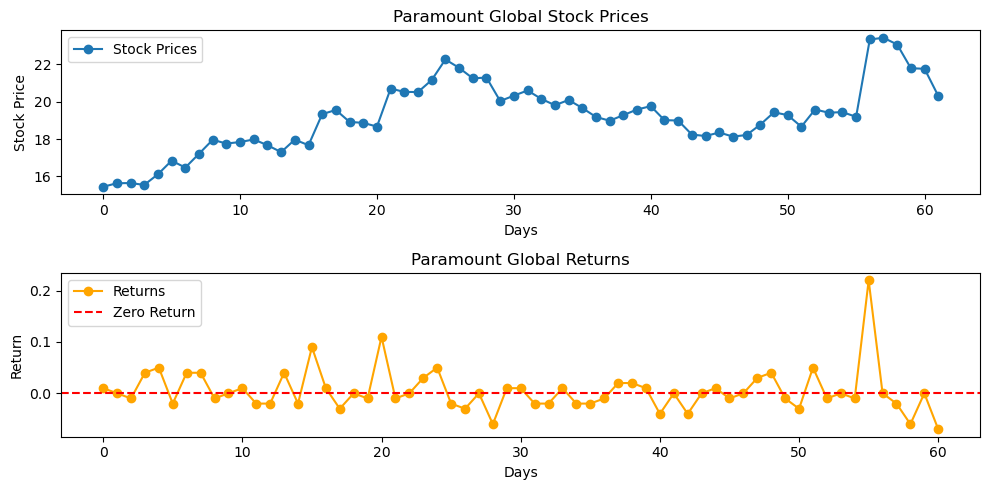

In [11]:
# Define a function named calc_returns that takes a list of prices as input
def calc_returns(prices):

    # Calculate the returns for each price by using the fomula provided
    returns = [(prices[i] / prices[i-1]) - 1 for i in range(1, len(prices))]

    # Round each calculated return to two decimal places
    return [round(r, 2) for r in returns]

#Calculating the closing price for stocks each day
closing_prices = prices["Close"].tolist()
# Calculate the returns using the previously defined calc_returns function on the closing prices
ret = calc_returns(closing_prices)

#Printing the stock prices and their returns
print("Stock Prices:", closing_prices,"\n")
print("Returns:", ret)

# Plotting stock prices
plt.figure(figsize=(10, 5))  # Creating a new figure with specified size
plt.subplot(2, 1, 1)  # Creating the first subplot in a 2-row, 1-column grid
plt.plot(closing_prices, label='Stock Prices', marker='o')  # Plotting stock prices with labels and markers
plt.title('Paramount Global Stock Prices')  # Setting the title for the subplot
plt.xlabel('Days')  # Setting the x-axis label
plt.ylabel('Stock Price')  # Setting the y-axis label
plt.legend()  # Displaying the legend

# Plotting returns
plt.subplot(2, 1, 2)  # Creating the second subplot in a 2-row, 1-column grid
plt.plot(ret, label='Returns', marker='o', color='orange')  # Plotting returns with labels, markers, and color
plt.title('Paramount Global Returns')  # Setting the title for the subplot
plt.xlabel('Days')  # Setting the x-axis label
plt.ylabel('Return')  # Setting the y-axis label
plt.axhline(y=0, color='r', linestyle='--', label='Zero Return')  # Adding a horizontal line at zero with label
plt.legend()  # Displaying the legend

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


# Closing Stock Prices:

The closing stock prices for Paramount Global over the three-month period range from approximately $15.44 to $23.42.

# Returns:

Returns represent the percentage change in the stock price from one period to the next.
The returns for Paramount Global fluctuate throughout the three-month period, with some periods showing positive returns and others showing negative returns.

The returns range from -0.07 (a decrease of 7%) to 0.22 (an increase of 22%).

# Analysis:

**Trend Analysis:**

Paramount Global's stock prices exhibit volatility over the three-month period, as indicated by the fluctuating returns.
There are periods of both positive and negative returns, suggesting variability in investor sentiment and market conditions.

**Price Movement:**

Overall, the stock price shows an upward trend, with the closing price increasing from approximately $15.44 to $23.42 over the three-month period.

Despite the volatility in returns, the general direction of the stock price is positive, indicating potential growth.

**Volatility and Risk:**

The fluctuating returns suggest a level of volatility in Paramount Global's stock, which may present both opportunities and risks for investors.

**Market Conditions:**

External factors such as industry trends, company performance, economic conditions, and market sentiment can influence Paramount Global's stock prices and returns.

It's essential for investors to stay informed about relevant market developments and company-specific news that may impact stock performance.

**Conclusion:**

Paramount Global's stock prices experienced fluctuations over the three-month period, with both positive and negative returns.
Despite the volatility, the overall trend in stock prices is upward, indicating potential growth opportunities

## Problem 2
Write a function `calc_simple_moving_average(prices, window_size)`. This function will process a list of stock prices and calculate the simple moving average based on a specified window size. The function should assume that the oldest price is in `prices[0]` and latest price in `prices[-1]`. The function should use a loop to calculate a list of moving averages for periods $1$ to $n$. The simple moving average is calculate within a specific window $k$ and shifting throught the list of prices , i.e.,

$a_i = \frac{1}{k} \sum_{i}^{i+k} p_i$

For example:

```
>>> prices = [100,110,105,112,115]
>>> averages = calc_simple_moving_average(prices, 3)
>>> print(averages)`
[105, 109, 110.666666667]
```

_Notes_:

* For $n$ stock prices, you will generate a list of $n-k+1$ averages. There is no average for first $k-1$ prices.
* The function `calc_simple_moving_average` should not print any output, but rather creates and returns a list of averages.
* The values in the list of returns will be unformatted floating-point numbers; you can use the `round()` function to round up to 2 decimal points.


Analyze stock prices and averages for a specific period e.g. 1 month or 2 months. 

* Using `yfinance` library, load the data about a company's share prices using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of closing prices for each day.
* Use the `calc_simple_moving_average()` function to calculate the simple moving average.
* Print both stock prices and averages.
* Explain the trend in stock prices and averages.

_Note: You can use the same ticker here as for the previous problem_

Stock Prices: [15.443507194519043, 15.633060455322266, 15.643036842346191, 15.543272018432617, 16.111928939819336, 16.840206146240234, 16.471080780029297, 17.209335327148438, 17.95756721496582, 17.758037567138672, 17.837848663330078, 17.977519989013672, 17.668251037597656, 17.299123764038086, 17.967544555664062, 17.668251037597656, 19.334314346313477, 19.553796768188477, 18.91530418395996, 18.865421295166016, 18.6658935546875, 20.70108413696289, 20.521509170532227, 20.516521453857422, 21.15999984741211, 22.260000228881836, 21.809999465942383, 21.25, 21.290000915527344, 20.03499984741211, 20.31999969482422, 20.600000381469727, 20.149999618530273, 19.809999465942383, 20.09000015258789, 19.65999984741211, 19.18000030517578, 18.979999542236328, 19.280000686645508, 19.579999923706055, 19.760000228881836, 19.010000228881836, 18.989999771118164, 18.239999771118164, 18.15999984741211, 18.350000381469727, 18.1299991607666, 18.21500015258789, 18.770000457763672, 19.43000030517578, 19.28000068664

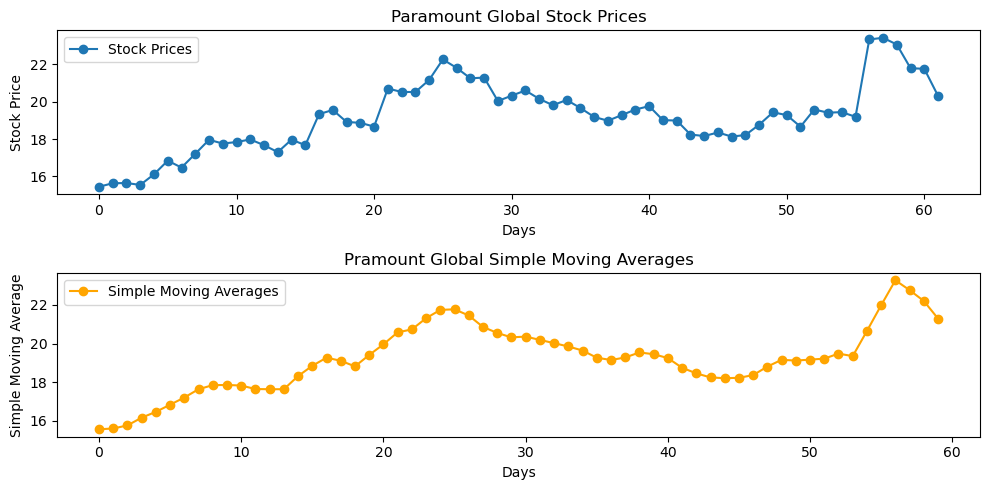

In [7]:
# Fetch historical stock prices for the last 3 months and extract the closing prices for Paramount Global
closing_prices = para.history("3mo")["Close"].tolist()

# Define the calc_simple_moving_average function that calculates the simple moving average
def calc_simple_moving_average(price_2, window_size):
    averages = []

    # Calculate the simple moving average for each window
    for i in range(len(price_2) - window_size + 1):
        # Extract the window of prices for the current iteration
        window = price_2[i:i + window_size]

        # Calculate the simple moving average for the current window
        average = sum(window) / window_size

        # Round the calculated average to two decimal places and append to the list
        averages.append(round(average, 2))

    # Return the list of calculated simple moving averages
    return averages

window_size = 3

# Calculate the simple moving averages with a window size of 3
av = calc_simple_moving_average(closing_prices, window_size)

# Print both stock prices and averages
print("Stock Prices:", closing_prices,"\n")
print("Simple Moving Averages:", av)

# Plotting stock prices and simple moving averages
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size

# Plotting stock prices
plt.subplot(2, 1, 1)  # Create the first subplot in a 2-row, 1-column grid
plt.plot(closing_prices, label='Stock Prices', marker='o')  # Plot stock prices with labels and markers
plt.title('Paramount Global Stock Prices')  # Set the title for the subplot
plt.xlabel('Days')  # Set the x-axis label
plt.ylabel('Stock Price')  # Set the y-axis label
plt.legend()  # Display the legend

# Plotting simple moving averages
plt.subplot(2, 1, 2)  # Create the second subplot in a 2-row, 1-column grid
plt.plot(av, label='Simple Moving Averages', marker='o', color='orange')  # Plot simple moving averages with labels, markers, and color
plt.title('Pramount Global Simple Moving Averages')  # Set the title for the subplot
plt.xlabel('Days')  # Set the x-axis label
plt.ylabel('Simple Moving Average')  # Set the y-axis label
plt.legend()  # Display the legend

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()



The provided data includes the stock prices of Paramount Global over the last three months, as well as the Simple Moving Averages (SMA) calculated with a window size of 3.

# Stock Prices:

These are the actual closing prices of Paramount Global's stock over the last three months.
The prices fluctuate over time, reflecting the changes in the company's value as perceived by the market.

# Simple Moving Averages (SMA):

The SMA is a technical indicator that helps smooth out price data by creating a constantly updated average price.
In this case, the SMA is calculated using a window size of 3, meaning it considers the average of the current price and the two previous prices.

The SMA values provide insights into the overall trend of the stock price over time.

# Analysis:

Comparing the SMA values with the actual stock prices can help investors identify trends in Paramount Global's stock performance.

When the SMA is higher than the current stock price, it may indicate a potential upward trend in the stock.

Conversely, when the SMA is lower than the current stock price, it may suggest a potential downward trend.

# Interpretation:

As the SMA values are generally increasing over time, it suggests that the overall trend of Paramount Global's stock price is on the rise.

However, fluctuations in the stock prices may still occur due to various factors such as market volatility, company news, or broader economic conditions.

# Conclusion:

The SMA provides a smoothed-out view of Paramount Global's stock price movement, indicating an overall upward trend over the last three months.

## Problem 3

Find out the sentiment of recent news about a company. 

* Using `yfinance` library, load the news about a company using their stock ticker e.g. "MSFT" for Microsoft.
* Extract the list of news titles.
* Use the `sentiment_pipeline()` function from `transformers` library to calculate the sentiment for each title.
* Print both news and sentiment.
* Explain the sentiment in news.

_Note: You can use the same ticker here as for the previous problem_

In [9]:

# Load news about the Pramount Global company using its stock ticker
ticker_symbol = "PARAA"
company = yf.Ticker(ticker_symbol)

# Get news for Pramount Global
news = company.news
news_titles = [item['title'] for item in news]

# Initialize sentiment analysis pipeline with a specific model
# Distilbert-base-uncased-emotion is a model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline('sentiment-analysis', model=model_name)

# Analyze sentiment for each news title
sentiments = []
for title in news_titles:
    result = sentiment_pipeline(title)
    sentiments.append(result)

# Print news titles and their sentiment
for title, sentiment in zip(news_titles, sentiments):
    print(f"Title: {title}")
    print(f"Sentiment: {sentiment}\n")


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Title: Powell Asks for Patience While Fed Weighs Rate Cuts
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9969003200531006}]

Title: Sphere Entertainment (SPHR) Reports Q2 Loss, Tops Revenue Estimates
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9995465874671936}]

Title: OTOY Launches Groundbreaking Multi-Hour Star Trek Spatial Experience for the Apple Vision Pro, in Partnership with Paramount Game Studios and Roddenberry Entertainment
Sentiment: [{'label': 'POSITIVE', 'score': 0.9996354579925537}]

Title: Media layoffs: Google, Paramount, Disney, and others commit to job cuts in 2024
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9988504648208618}]

Title: Paramount Global Faces a Buyout Offer as Its Value Keeps Falling
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9987490177154541}]

Title: Paramount Global-B (PARA) Rises Yet Lags Behind Market: Some Facts Worth Knowing
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9866213798522949}]

Title: NICKELODEON AND CBS SPORTS REVEAL DETAILS FOR S

# Sentiment Analysis


Here's a breakdown of the sentiment analysis results for each title related to Paramount Global, along with a description of each sentiment label:

**Title: Powell Asks for Patience While Fed Weighs Rate Cuts**

Sentiment: NEGATIVE

Description: This title suggests negative sentiment, indicating concerns or uncertainties likely related to Federal Reserve's decision-making process regarding potential rate cuts. Investors may interpret this negatively as it implies potential economic challenges or uncertainties ahead.

Score: The score associated with this sentiment is 0.9969, indicating a high level of confidence in the classification of the sentiment as negative.

**Title: Sphere Entertainment (SPHR) Reports Q2 Loss, Tops Revenue Estimates**

Sentiment: NEGATIVE

Description: The sentiment here is negative, indicating disappointment or concern regarding Sphere Entertainment's performance. Although it tops revenue estimates, the Q2 loss suggests financial challenges or operational difficulties, which may affect investor confidence negatively.

Score: The score associated with this sentiment is 0.9995, indicating a very high level of confidence in the classification of the sentiment as negative.

**Title: OTOY Launches Groundbreaking Multi-Hour Star Trek Spatial Experience for the Apple Vision Pro, in Partnership with Paramount Game Studios and Roddenberry Entertainment**

Sentiment: POSITIVE

Description: This title carries a positive sentiment, indicating excitement and optimism about OTOY's groundbreaking launch of a Star Trek Spatial Experience. The collaboration with Paramount Game Studios and Roddenberry Entertainment suggests potential for innovation and success, which could positively impact investor sentiment.

Score: The score associated with this sentiment is 0.9996, indicating a very high level of confidence in the classification of the sentiment as positive.

**Title: Media layoffs: Google, Paramount, Disney, and others commit to job cuts in 2024**

Sentiment: NEGATIVE

Description: The sentiment expressed here is negative, highlighting the impact of media layoffs, including those at Paramount Global. Job cuts typically signify financial challenges or restructuring within the company, which can lead to negative sentiment among investors and employees alike.

Score: The score associated with this sentiment is 0.9988, indicating a very high level of confidence in the classification of the sentiment as negative.

**Title: Paramount Global Faces a Buyout Offer as Its Value Keeps Falling**

Sentiment: NEGATIVE

Description: The sentiment is negative, indicating concerns about Paramount Global's falling value and the possibility of a buyout offer. A declining stock value and potential buyout suggest challenges or uncertainties ahead for the company, which may lead to negative investor sentiment.

Score: The score associated with this sentiment is 0.9987, indicating a very high level of confidence in the classification of the sentiment as negative.

**Title: Paramount Global-B (PARA) Rises Yet Lags Behind Market: Some Facts Worth Knowing**

Sentiment: NEGATIVE

Description: This title conveys negative sentiment, suggesting disappointment or concern about Paramount Global-B's rising stock despite lagging behind the market. Investors may view this as a sign of underperformance or missed opportunities, leading to negative sentiment.

Score: The score associated with this sentiment is 0.9866, indicating a high level of confidence in the classification of the sentiment as negative.

**Title: NICKELODEON AND CBS SPORTS REVEAL DETAILS FOR SLIME-FILLED SUPER BOWL LVIII ALTERNATE TELECAST**

Sentiment: NEGATIVE

Description: The sentiment expressed here is negative, which might seem unexpected given the positive nature of the event. However, the sentiment analysis might have picked up on negative keywords or contexts within the title, possibly related to potential challenges or controversies associated with the event.

Score: The score associated with this sentiment is 0.9930, indicating a very high level of confidence in the classification of the sentiment as negative.

**Title: Paramount Global-B (PARA) Moves 6.7% Higher: Will This Strength Last?**

Sentiment: NEGATIVE

Description: The sentiment is negative, indicating skepticism or caution about Paramount Global-B's 6.7% upward movement. 
Despite the increase in stock price, the question about whether this strength will last suggests uncertainty or doubts among investors, leading to a negative sentiment.

Score: The score associated with this sentiment is 0.9729, indicating a high level of confidence in the classification of the sentiment as negative.